In [10]:
from pathlib import Path
import os
from scipy.io import savemat
#import h5py
import mat73
#from skimage import io 
#from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

[0.08893281 0.02173913 0.        ]
0.034450395256916996


numpy.ndarray

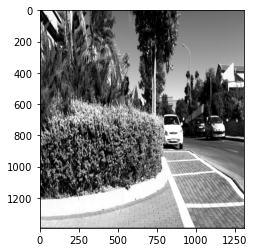

In [16]:
p= Path("E:/Documentos/Dataset")
dirs = os.listdir(p)
dirg="E:/Documentos/Dataset/"
imagenes=mat73.loadmat(dirg+dirs[70]).get('rgb')
img = color.rgb2gray(imagenes)
imgplot = plt.imshow(img,cmap=plt.cm.gray)
print(imagenes[0,0,:])
print(img[0,0])
len(dirs)
type(imagenes)
#imagenes.save('my.png')
#imagenes.show()

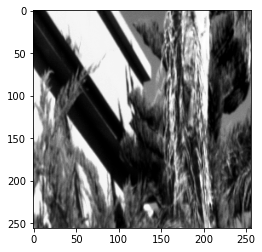

In [28]:
ctimg=img[:256,:256]
ctimg.shape
ctplot = plt.imshow(ctimg,cmap=plt.cm.gray)

In [29]:
ctimg.shape
p1=ctimg.reshape(ctimg.shape[0]*ctimg.shape[0])
p1.shape

(65536,)

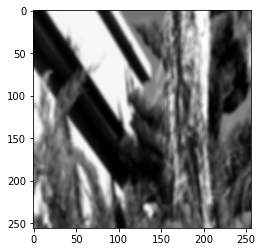

In [30]:
bluimg=cv2.GaussianBlur(ctimg,(5,5),3)#seleccion de permetros 
bluimg.shape
bluplot = plt.imshow(bluimg,cmap=plt.cm.gray)

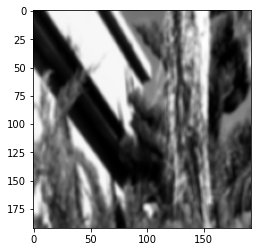

In [31]:
frm=bluimg.shape
val=int(frm[0]-(frm[0]*0.25))
rdimg=cv2.resize(bluimg, dsize=(val, val), interpolation=cv2.INTER_LINEAR)#escoger el interpolador 
rdimg.shape
p2=rdimg.reshape(val*val)
rdplot = plt.imshow(rdimg,cmap=plt.cm.gray)

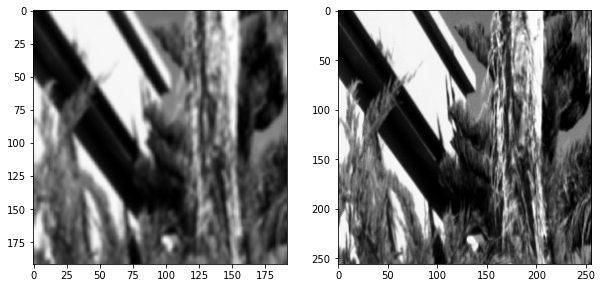

In [33]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(rdimg,cmap=plt.cm.gray)
fig.add_subplot(1, 2, 2)
plt.imshow(ctimg,cmap=plt.cm.gray)


In [74]:
svfile={'lwres':rdimg}
savemat('test.mat',svfile)